<a href="https://colab.research.google.com/github/ankushsil17/Face_Mask_Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 98% 160M/163M [00:00<00:00, 278MB/s]
100% 163M/163M [00:00<00:00, 259MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1593.jpg', 'with_mask_1838.jpg', 'with_mask_1871.jpg', 'with_mask_1530.jpg', 'with_mask_3497.jpg']
['with_mask_1412.jpg', 'with_mask_114.jpg', 'with_mask_58.jpg', 'with_mask_3031.jpg', 'with_mask_2174.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3563.jpg', 'without_mask_3758.jpg', 'without_mask_2411.jpg', 'without_mask_2552.jpg', 'without_mask_1615.jpg']
['without_mask_3023.jpg', 'without_mask_3433.jpg', 'without_mask_2969.jpg', 'without_mask_1913.jpg', 'without_mask_778.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

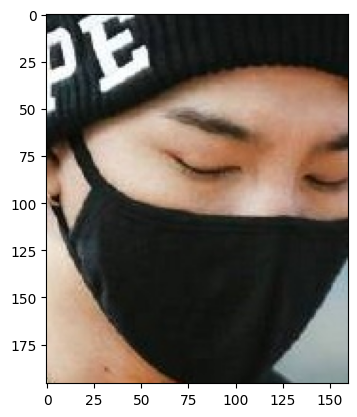

In [16]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_114.jpg')
imgplot = plt.imshow(img)
plt.show()

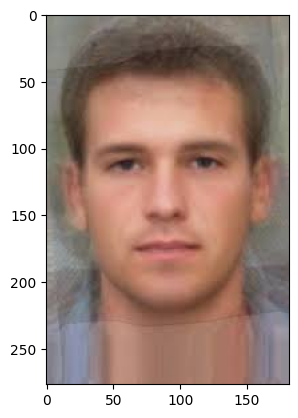

In [17]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2411.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [18]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [19]:
type(data)

list

In [20]:
len(data)

7553

In [21]:
data[0]

array([[[152, 152, 152],
        [239, 239, 239],
        [248, 248, 248],
        ...,
        [237, 222, 199],
        [229, 214, 192],
        [143, 128, 113]],

       [[254, 254, 254],
        [252, 252, 252],
        [250, 250, 250],
        ...,
        [236, 222, 198],
        [237, 222, 198],
        [240, 225, 201]],

       [[254, 254, 254],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [237, 223, 197],
        [234, 220, 195],
        [234, 219, 195]],

       ...,

       [[ 59,  42,  35],
        [ 57,  40,  33],
        [ 59,  42,  35],
        ...,
        [ 25,  19,  19],
        [ 26,  20,  20],
        [ 27,  21,  21]],

       [[ 59,  42,  35],
        [ 59,  42,  35],
        [ 64,  47,  40],
        ...,
        [ 29,  23,  23],
        [ 30,  24,  24],
        [ 25,  19,  19]],

       [[ 39,  22,  15],
        [ 52,  35,  28],
        [ 70,  53,  46],
        ...,
        [ 35,  29,  29],
        [ 34,  28,  28],
        [ 19,  13,  13]]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [31]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [32]:
X_train[0]

array([[[ 2,  2, 10],
        [ 2,  2, 10],
        [ 3,  3, 11],
        ...,
        [70, 48, 49],
        [73, 52, 52],
        [75, 55, 53]],

       [[ 2,  2, 10],
        [ 2,  2, 10],
        [ 3,  3, 11],
        ...,
        [65, 43, 45],
        [70, 48, 48],
        [73, 52, 51]],

       [[ 2,  2, 10],
        [ 2,  2, 10],
        [ 3,  3, 11],
        ...,
        [58, 36, 38],
        [65, 44, 44],
        [69, 48, 47]],

       ...,

       [[ 0,  1,  3],
        [ 0,  1,  3],
        [ 1,  2,  4],
        ...,
        [72, 62, 86],
        [70, 61, 83],
        [70, 61, 81]],

       [[ 0,  1,  3],
        [ 0,  1,  3],
        [ 1,  2,  4],
        ...,
        [80, 71, 94],
        [79, 71, 92],
        [80, 71, 92]],

       [[ 0,  1,  3],
        [ 0,  1,  3],
        [ 1,  2,  4],
        ...,
        [79, 71, 94],
        [79, 71, 92],
        [79, 71, 92]]], dtype=uint8)

In [33]:
X_train_scaled[0]

array([[[0.00784314, 0.00784314, 0.03921569],
        [0.00784314, 0.00784314, 0.03921569],
        [0.01176471, 0.01176471, 0.04313725],
        ...,
        [0.2745098 , 0.18823529, 0.19215686],
        [0.28627451, 0.20392157, 0.20392157],
        [0.29411765, 0.21568627, 0.20784314]],

       [[0.00784314, 0.00784314, 0.03921569],
        [0.00784314, 0.00784314, 0.03921569],
        [0.01176471, 0.01176471, 0.04313725],
        ...,
        [0.25490196, 0.16862745, 0.17647059],
        [0.2745098 , 0.18823529, 0.18823529],
        [0.28627451, 0.20392157, 0.2       ]],

       [[0.00784314, 0.00784314, 0.03921569],
        [0.00784314, 0.00784314, 0.03921569],
        [0.01176471, 0.01176471, 0.04313725],
        ...,
        [0.22745098, 0.14117647, 0.14901961],
        [0.25490196, 0.17254902, 0.17254902],
        [0.27058824, 0.18823529, 0.18431373]],

       ...,

       [[0.        , 0.00392157, 0.01176471],
        [0.        , 0.00392157, 0.01176471],
        [0.00392157, 0

**Building a Convolutional Neural Networks (CNN)**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [36]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [37]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 21ms/step - loss: 0.4788 - acc: 0.7988 - val_loss: 0.3049 - val_acc: 0.8579
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2976 - acc: 0.8862 - val_loss: 0.2369 - val_acc: 0.8843
Epoch 3/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2493 - acc: 0.8990 - val_loss: 0.2198 - val_acc: 0.8975
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2145 - acc: 0.9193 - val_loss: 0.2001 - val_acc: 0.9124
Epoch 5/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1699 - acc: 0.9356 - val_loss: 0.1924 - val_acc: 0.9091


**Model Evaluation**

In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2266 - acc: 0.9226
Test Accuracy = 0.9225678443908691


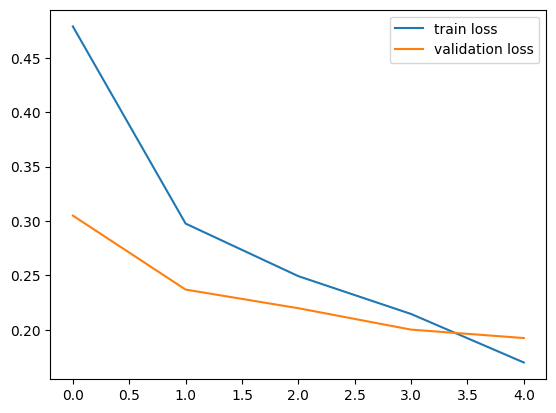

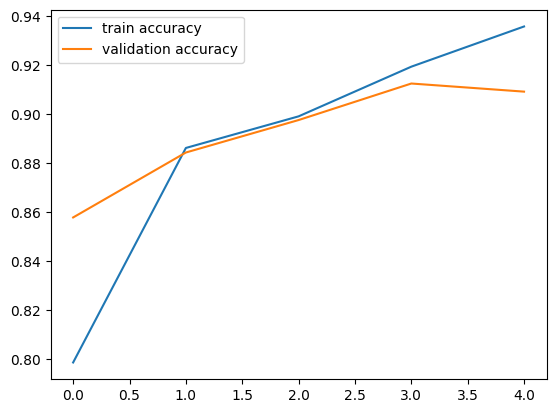

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/masktest2.jpg


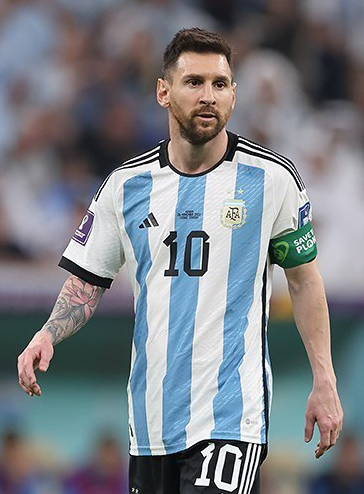

1/1 [==============================] - 0s 31ms/step
[[0.573035   0.44455788]]
0
The person in the image is not wearing a mask


In [46]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')